<a href="https://colab.research.google.com/github/fahmida0404/network-threat-detection/blob/main/notebooks/CSE_CIC_IDS_2018(Preprocessing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Data Analysis**

In [ ]:
#Load dataset
data = pd.read_csv("/content/drive/MyDrive/IDS/Dataset/CIC-IDS-2018.csv")

/tmp/ipython-input-2844774004.py:2: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/IDS/Dataset/CIC-IDS-2018.csv")


In [ ]:
data.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,6,21/02/2018 08:33:25,37953,5,3,135,127,135,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,500,17,21/02/2018 08:33:06,117573474,3,0,1500,0,500,500,...,8,0.0,0.0,0,0,58800000.0,23800000.0,75600000,42000000,Benign
2,500,17,21/02/2018 08:33:06,117573474,3,0,1500,0,500,500,...,8,0.0,0.0,0,0,58800000.0,23800000.0,75600000,42000000,Benign
3,500,17,21/02/2018 08:33:11,99743998,5,0,2500,0,500,500,...,8,4000290.0,0.0,4000290,4000290,31900000.0,37900000.0,75600000,7200397,Benign
4,500,17,21/02/2018 08:33:11,99743999,5,0,2500,0,500,500,...,8,4000286.0,0.0,4000286,4000286,31900000.0,37900000.0,75600000,7200399,Benign


In [ ]:
data.shape

(3145725, 80)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3145725 entries, 0 to 3145724
Data columns (total 80 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Dst Port           object
 1   Protocol           object
 2   Timestamp          object
 3   Flow Duration      object
 4   Tot Fwd Pkts       object
 5   Tot Bwd Pkts       object
 6   TotLen Fwd Pkts    object
 7   TotLen Bwd Pkts    object
 8   Fwd Pkt Len Max    object
 9   Fwd Pkt Len Min    object
 10  Fwd Pkt Len Mean   object
 11  Fwd Pkt Len Std    object
 12  Bwd Pkt Len Max    object
 13  Bwd Pkt Len Min    object
 14  Bwd Pkt Len Mean   object
 15  Bwd Pkt Len Std    object
 16  Flow Byts/s        object
 17  Flow Pkts/s        object
 18  Flow IAT Mean      object
 19  Flow IAT Std       object
 20  Flow IAT Max       object
 21  Flow IAT Min       object
 22  Fwd IAT Tot        object
 23  Fwd IAT Mean       object
 24  Fwd IAT Std        object
 25  Fwd IAT Max        object
 26  Fwd IAT Min   

In [ ]:
data.describe()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,3145725,3145725,3145725,3145725,3145725,3145725,3145725,3145725,3145725,3145725,...,3145725,3145725.0,3145725.0,3145725,3145725,3145725.0,3145725.0,3145725,3145725,3145725
unique,31414,7,40296,886238,2412,1206,9443,22917,1470,148,...,17,129386.0,94384.0,123845,72895,199932.0,100923.0,170968,181014,8
top,80,6,16/02/2018 01:45:28,2,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
freq,1390050,2769599,8403,60172,1165921,1216051,1374942,1467217,1374942,2781932,...,1662088,2986473.0,3041772.0,2986473,2986473,2915087.0,3026963.0,2915087,2915087,1803682


In [ ]:
data.dtypes

,0
Dst Port,object
Protocol,object
Timestamp,object
Flow Duration,object
Tot Fwd Pkts,object
...,...
Idle Mean,object
Idle Std,object
Idle Max,object
Idle Min,object


In [ ]:
data['Label'].value_counts()

,count
Label,
Benign,1803682
DDOS attack-HOIC,686012
DoS attacks-Hulk,461912
DoS attacks-SlowHTTPTest,139890
DoS attacks-GoldenEye,41508
DoS attacks-Slowloris,10990
DDOS attack-LOIC-UDP,1730
Label,1


In [ ]:
data.drop(data[data['Label']=='Label'].index,inplace=True) #Drop unnecesary Label

Text(0.5, 1.0, 'Intrusion Attack Distribution')

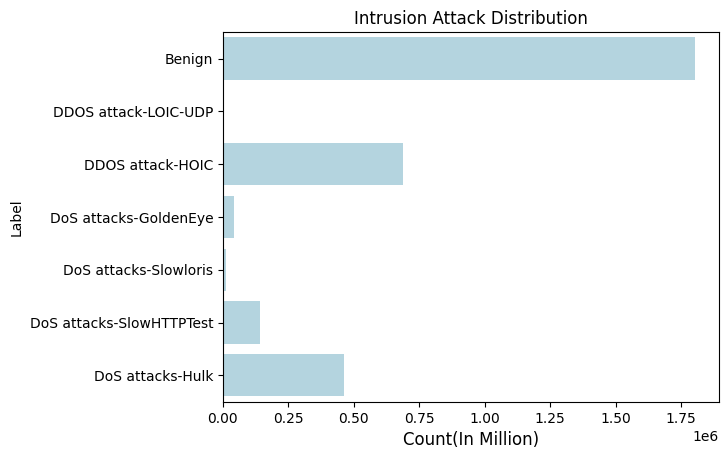

In [ ]:
sns.countplot(y="Label", data=data, color='LightBlue')
plt.xlabel('Count(In Million)', fontsize=12)
plt.title('Intrusion Attack Distribution')

### **Data Preprocessing**

In [ ]:
data.drop(['Timestamp','Dst Port'],axis=1,inplace=True) #Irrelevant Features

**Convert Datatype**

In [ ]:
cols = data.columns.drop("Label")
for col in cols:
  data[col] = pd.to_numeric(data[col])

In [ ]:
data.dtypes

,0
Protocol,int64
Flow Duration,int64
Tot Fwd Pkts,int64
Tot Bwd Pkts,int64
TotLen Fwd Pkts,int64
...,...
Idle Mean,float64
Idle Std,float64
Idle Max,int64
Idle Min,int64


**Zero Variance**

In [ ]:
var = data.drop("Label", axis=1).var()
for col in var.index:
  if var[col] == 0:
    print(f"{col} has only {data[col].nunique()} value: {data[col].unique()}")

Bwd PSH Flags has only 1 value: [0]
Fwd URG Flags has only 1 value: [0]
Bwd URG Flags has only 1 value: [0]
CWE Flag Count has only 1 value: [0]
Fwd Byts/b Avg has only 1 value: [0]
Fwd Pkts/b Avg has only 1 value: [0]
Fwd Blk Rate Avg has only 1 value: [0]
Bwd Byts/b Avg has only 1 value: [0]
Bwd Pkts/b Avg has only 1 value: [0]
Bwd Blk Rate Avg has only 1 value: [0]


In [ ]:
#Drop the columns wht one value (only zero)
columns=['Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','CWE Flag Count','Fwd Byts/b Avg','Fwd Pkts/b Avg' ,'Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg']
data.drop(columns=columns, axis=1, inplace=True)

In [ ]:
data.shape

(3145724, 68)

**Duplicates**

In [ ]:
data.duplicated().sum()

np.int64(1196887)

In [ ]:
data.drop_duplicates(keep="first", inplace=True)

In [ ]:
data.shape

(1948837, 68)

**Missing Value**

In [ ]:
print(data.isna().sum()[data.isna().sum()>0])

Flow Byts/s    547
dtype: int64


In [ ]:
for col in data.drop("Label", axis=1).columns:
  if data[col].max()==np.inf:
    print(f"{col} {data[col].max()}")

Flow Byts/s inf
Flow Pkts/s inf


In [ ]:
data.fillna({"Flow Byts/s":0}, inplace=True) # Fill NaN values with 0
data.replace([np.inf, -np.inf], 0, inplace=True) # Replace both positive and negative infinity values to 0 as it can led from 0 to 0 division

In [ ]:
data.shape

(1948837, 68)

**Negative/Invalid Data**

In [ ]:
for col in data.drop("Label",axis=1).columns:
  m=data[col].min()
  if m<0:
    print(f"{col} {m}")

Init Fwd Win Byts -1
Init Bwd Win Byts -1


In [ ]:
neg=['Init Fwd Win Byts','Init Bwd Win Byts']
for col in neg:
  negative_rows = data[data[col] < 0].index
  data=data.drop(negative_rows)

In [ ]:
data.shape

(1419013, 68)

In [ ]:
data['Label'].value_counts()

,count
Label,
Benign,1194264
DDOS attack-HOIC,163750
DoS attacks-GoldenEye,27772
DoS attacks-Hulk,25548
DoS attacks-Slowloris,7624
DoS attacks-SlowHTTPTest,55


In [ ]:
#Convert attacks as 'Malicious'
data.replace(to_replace=["DDOS attack-HOIC", "DoS attacks-GoldenEye", "DoS attacks-Hulk", "DoS attacks-Slowloris", "DoS attacks-SlowHTTPTest"], value="Malicious", inplace=True)

In [ ]:
data['Label'].value_counts()

,count
Label,
Benign,1194264
Malicious,224749


In [ ]:
data.head()

,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,37953,5,3,135,127,135,0,27.000000,60.373835,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
21,6,368041,5,6,583,1017,560,0,116.600000,248.068136,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
22,6,94821,3,1,56,0,56,0,18.666667,32.331615,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
23,6,1317480,4,6,384,64,128,64,96.000000,36.950417,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
32,6,247053,3,4,44,964,44,0,14.666667,25.403412,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign


### **Data Visualization**

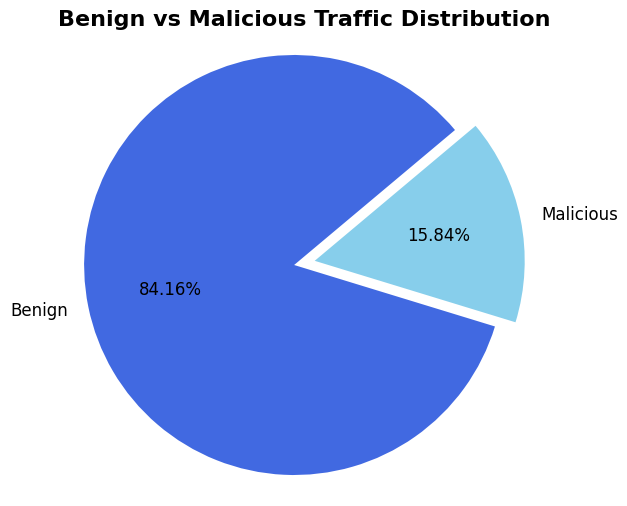

In [ ]:
benign_count = data['Label'].value_counts().get('Benign')
malicious_count = data['Label'].value_counts().get('Malicious')

# Define labels and sizes
labels = ['Benign', 'Malicious']
sizes = [benign_count, malicious_count]

# Define colors
colors = ['RoyalBlue', 'skyBlue']  # Royalblue for Benign, Skyblue for Malicious
explode=(0.1,0)
# Create the pie chart
plt.figure(figsize=(7, 6))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct='%2.2f%%', startangle=40,textprops={'fontsize': 12})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Benign vs Malicious Traffic Distribution', fontsize=16, fontweight='bold')
plt.show()

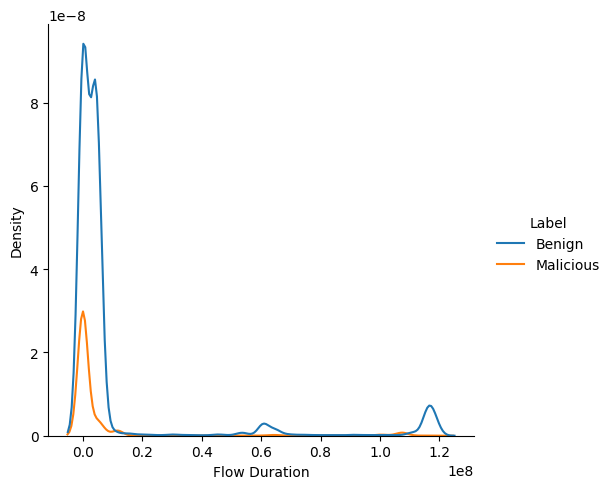

In [ ]:
sns.displot(x="Flow Duration", data=data, hue="Label", kind="kde")

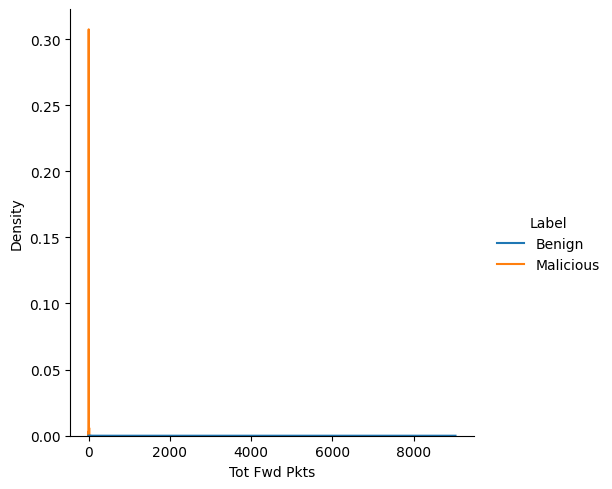

In [ ]:
sns.displot(x="Tot Fwd Pkts", data=data, hue="Label", kind="kde")

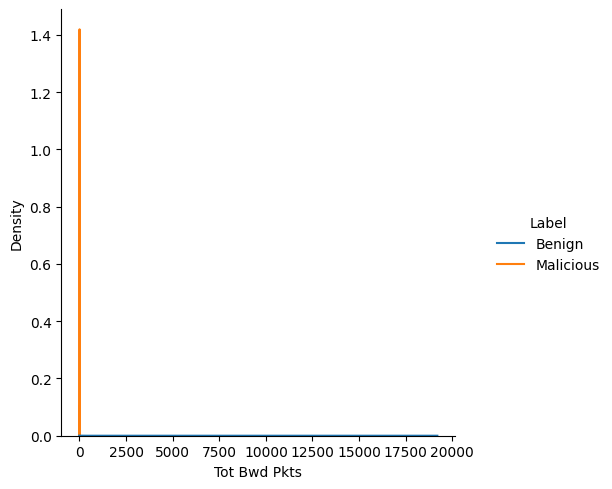

In [ ]:
sns.displot(x="Tot Bwd Pkts", data=data, hue="Label", kind="kde")

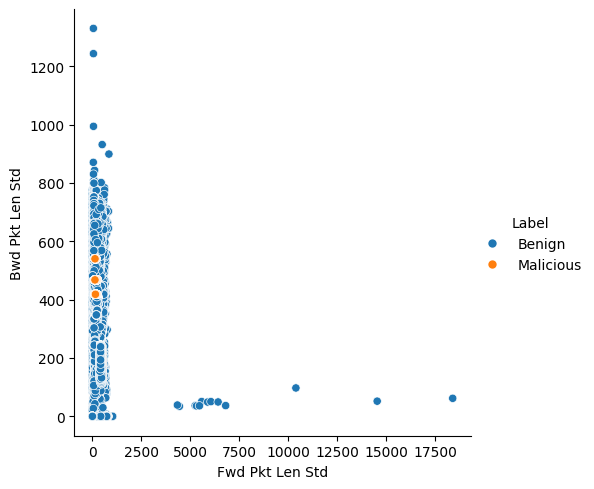

In [ ]:
sns.relplot(x="Fwd Pkt Len Std", y="Bwd Pkt Len Std", data=data, hue="Label")

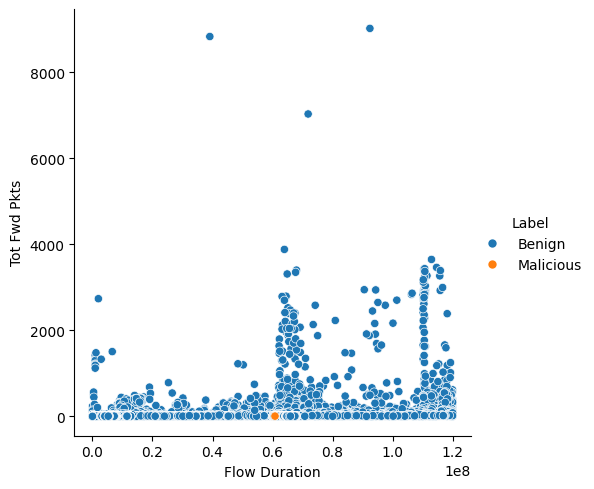

In [ ]:
sns.relplot(x="Flow Duration", y="Tot Fwd Pkts", data=data, hue="Label")

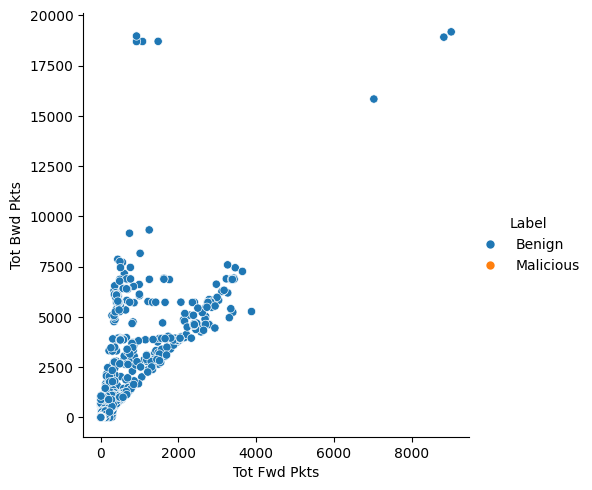

In [ ]:
sns.relplot(x="Tot Fwd Pkts", y="Tot Bwd Pkts", data=data, hue="Label")

### **Preprocessed Dataset**

In [ ]:
data.to_csv('CIC-IDS-2018(Preprocessed).csv', index=False) #Save as csv file